# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>
# <center> `Team Capston Project - Almabetter School` </center>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#### Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')

#### Importing Data From Google Drive

In [ ]:
## Importing Data From Google Drive
from google.colab import drive
drive.mount('/content/drive')

credit_data_loc = '/content/drive/MyDrive/Almabetter/Capston Project/Credit Card Default Prediction/default_of_credit_card_clients.csv'
credit_data = pd.read_csv(credit_data_loc,header = 1)

Mounted at /content/drive


#### Exploring the Data 

In [ ]:
# Check The First Five rows
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# last five rows
credit_data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
# Check Total Number of rows and Columns in dataset.
print(f' The shape of dataset is ({(credit_data.shape[0])} x {(credit_data.shape[1])})\n Total Number of Rows are : {(credit_data.shape)[0]}\n Total Number of Columns are : {(credit_data.shape)[1]}')

 The shape of dataset is (30000 x 25)
 Total Number of Rows are : 30000
 Total Number of Columns are : 25


In [ ]:
# List of all columns in Dataset
pd.DataFrame(credit_data.columns).T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
credit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
## Find the missing value, show the total null values for each column and sort it in descending order
credit_data.isnull().sum().sort_values(ascending=False)[:10] 

ID           0
BILL_AMT2    0
PAY_AMT6     0
PAY_AMT5     0
PAY_AMT4     0
PAY_AMT3     0
PAY_AMT2     0
PAY_AMT1     0
BILL_AMT6    0
BILL_AMT5    0
dtype: int64

Text(0.5, 1.0, 'HeatMap Shows Ratio of Missing Value')

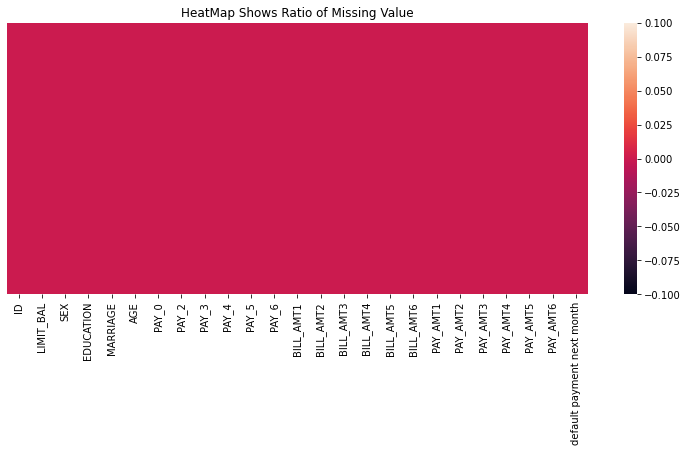

In [ ]:
# Visulaizing the null values.
plt.figure(figsize=(13,5))
sns.heatmap(credit_data.isnull(),yticklabels=False)
plt.title("HeatMap Shows Ratio of Missing Value")

In [ ]:
#print the unique value
pd.DataFrame(credit_data.nunique()).T

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2


In [ ]:
# Checking Duplicate Values
value= credit_data.duplicated().sum()
print("The Total number of duplicate values in the data set is =",value)

The Total number of duplicate values in the data set is = 0


#### For Better Analysing we change the column name from default payment next month to default_payment_next_month

In [ ]:
credit_data.rename(columns={'default payment next month' : 'default_payment_next_month'}, inplace=True)
new_column_name  = pd.DataFrame(credit_data.columns).T
new_column_name

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month


####Count the value from default_payment_next_month, sex, education, marriage & age

In [ ]:
# counts the values of default payment next month cloumns
pd.DataFrame(credit_data['default_payment_next_month'].value_counts()).T

,0,1
default_payment_next_month,23364,6636


default_payment_next_month :-  

> 0 - Non-Defaulter

> 1 - Defaulter





In [ ]:
# Get the proportion of customers who had default payment in the next month  
# About 22% customers had default payment next month

credit_data['default_payment_next_month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default_payment_next_month, dtype: float64

In [ ]:
# Counts the values of SEX variable data set
pd.DataFrame(credit_data['SEX'].value_counts()).T

,2,1
SEX,18112,11888


Sex :-

> 1 - Male

> 2 - Female

In [ ]:
# Counts the values of Education
pd.DataFrame(credit_data['EDUCATION'].value_counts()).T

,2,1,3,5,4,6,0
EDUCATION,14030,10585,4917,280,123,51,14



Education :-
> 1 - Graduate School

> 2 - University

> 3 - High School 

> 0,4,5,6 - Others




In [ ]:
# Counts the values of Marriage
pd.DataFrame(credit_data['MARRIAGE'].value_counts()).T

,2,1,3,0
MARRIAGE,15964,13659,323,54


Marriage :-  
> 1 - Married

> 2 - Single

> 3 & 0 - Others

In [ ]:
# Counts the values of Age
pd.DataFrame(credit_data['AGE'].value_counts()).T

,29,27,28,30,26,31,25,34,32,33,...,67,69,70,68,73,72,75,71,79,74
AGE,1605,1477,1409,1395,1256,1217,1186,1162,1158,1146,...,16,15,10,5,4,3,3,3,1,1


#### EDA ( Exploratory Data Analysis )

In [ ]:
## Main Part Start EDA
## For Easily Ploting Graph we Create a function so we use it directly by just calling the function and Enter value inside it.
## For Ploting Graph we use seaborn and pyplot.
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(8,5), type='bar'):
    '''
    INPUT Work :
        x-:        Array containing values for x-axis
        y-:        Array containing values for y-axis
        x_lable-:  String value for x-axis label
        y_lable-:  String value for y-axis label
        title-:    String value for plot title
        figsize-:  tuple value, for figure size
        type-:     type of plot (default is bar plot) 
    OUTPUT-:
        Display the plot
    '''
    sns.set_style('darkgrid') ## We call seaborn as sns for set background style in DarkGrid
    fig, ax = plt.subplots(figsize=figsize)   
    colors = sns.color_palette('pastel')[0:5]
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax)
    elif type == 'pie' :
        plt.pie(y, labels= x ,colors=colors , shadow = True ,autopct='%.0f%%')
  
    plt.show()

In [ ]:
## Another Function for Count the Values (Capturing the values) from the dataset.
def get_count(column, limit=None):
    
    '''
    INPUT Work:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        column = column.value_counts()[:limit]
    else:
        column = column.value_counts()
    
    x = column.index
    y = column/column.sum()*100
    return x.values,y.values
  


#### 1) Visualize the data of Defaulters vs Non-Defaulters 

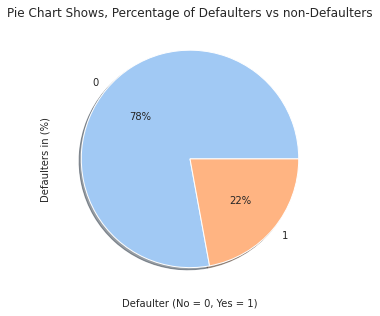

In [ ]:
x,y = get_count(credit_data['default_payment_next_month'])
plot(x,y, x_label='Defaulter (No = 0, Yes = 1)', y_label='Defaulters in (%)', type = 'pie', title = 'Pie Chart Shows, Percentage of Defaulters vs non-Defaulters') 

As we can see from above graph that both classes are not in proportion and we have imbalanced dataset. we need to do normalize the data in next step.

#### 2) Visualize the data of Male vs Female

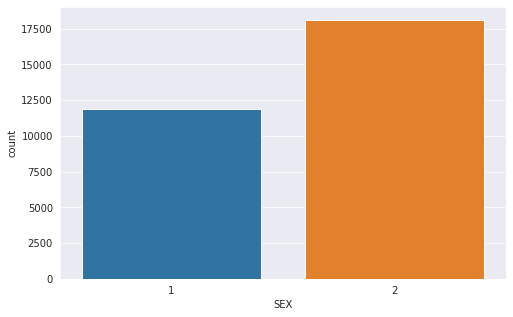

In [ ]:
plt.figure(figsize=(8,5)) 
sns.countplot(x = 'SEX', data = credit_data)

**Now Here We Observe From the above chart, There are Female Credit Holder is More than Male Credit Holder**
*   **1 - Male**
*   **2 - Female**


#### 3) Visualize the data of Education of Credit Card Holders

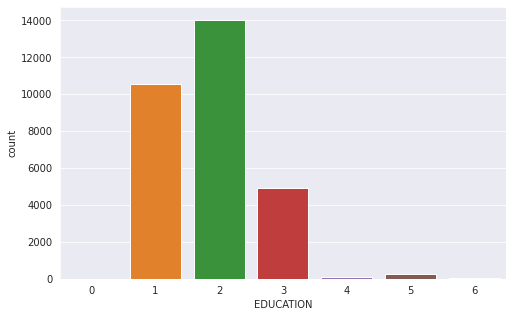

In [ ]:
plt.figure(figsize=(8,5)) 
sns.countplot(x = 'EDUCATION', data = credit_data)

 **1 = graduate school; 2 = university; 3 = high school; 0 = others**
* **From the above visualization data we see Highest Number of credit holders are university students then 2nd Highest are Graduate Students then 3rd Highest from High school Students & Remaining from Others.**


#### 4) Visualize the data From Marriage Column

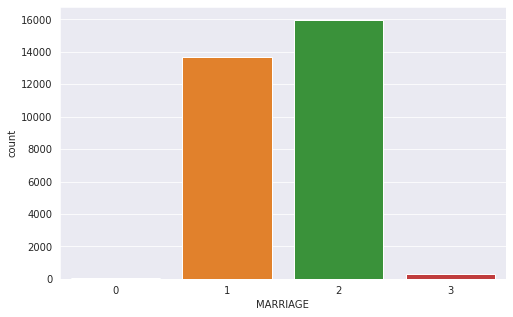

In [ ]:
plt.figure(figsize=(8,5)) 
sns.countplot(x = 'MARRIAGE', data = credit_data)

*   **1 - married**
*   **2 - single**
*   **3 - others**
* **From the above visualization data we see Highest Number of credit holders are Single then 2nd Highest are Married then 3rd & 0 from Others.**


####5) Visualize the data of Number of People By Age

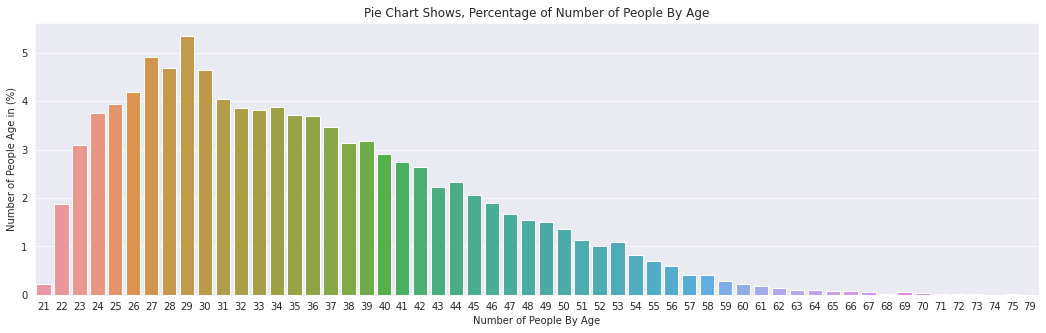

In [ ]:
x,y = get_count(credit_data['AGE'])
plot(x,y, x_label='Number of People By Age', y_label='Number of People Age in (%)', figsize=(18,5),title = 'Pie Chart Shows, Percentage of Number of People By Age') 

**From the above Age Data we Visualize**
*  ***We observe Most of credit card holders age start from 24-32 Years old & peoples age above 61 year old use credit card very rarely***


#### Let's Describe  the limit balance  data set

In [ ]:
credit_data['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

#### Now we visualize the Data Distribution from LIMIT_BAL Column

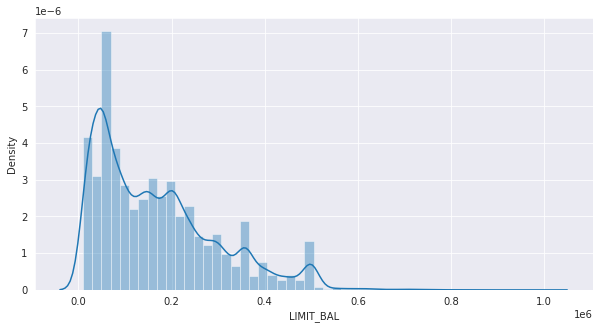

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(credit_data['LIMIT_BAL'],kde=True)
plt.show()

**From the above data analysis we can say that**
* ***Maximum amount of given credit in NT dollars is 50,000 followed by 30,000 and 20,000.***

#### Visualize the data of default payment next month with limit Balance

[Text(0.5, 1.0, 'Rented bikes Count acording to Seasons')]

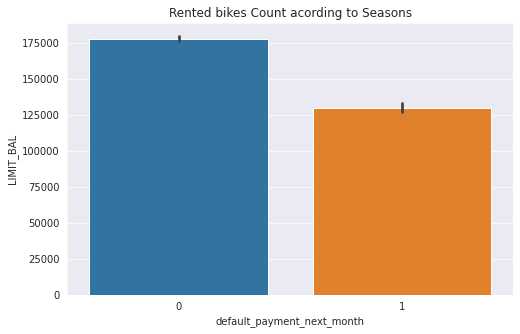

In [ ]:
fig,ax=plt.subplots(figsize=(8,5))
sns.barplot(data=credit_data,x='default_payment_next_month',y='LIMIT_BAL')
ax.set(title='Rented bikes Count acording to Seasons')

#### Visualize the data of default payment next month with Sex Column

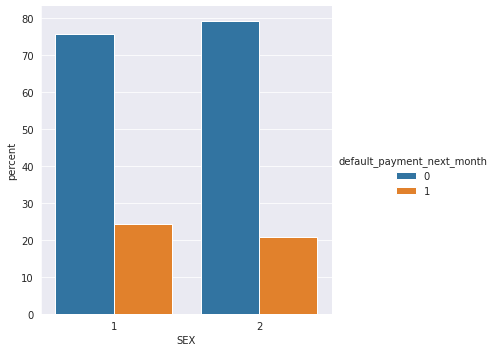

In [ ]:
x,y = 'SEX', 'default_payment_next_month'
(credit_data.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

#### Visualize the data of default payment next month with Education Column

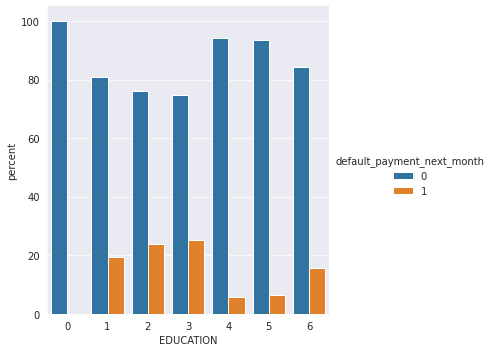

In [ ]:
x,y = 'EDUCATION', 'default_payment_next_month'
(credit_data.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

#### Visualize the data of default payment next month with Marriage Column

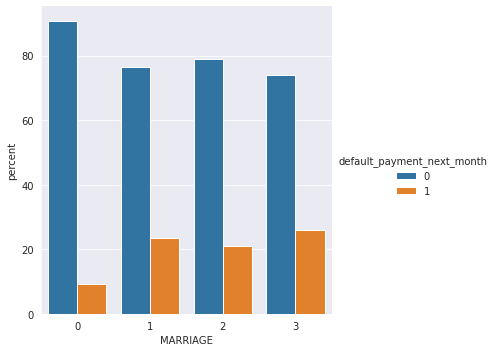

In [ ]:
x,y = 'MARRIAGE', 'default_payment_next_month'
(credit_data.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

#### Visualize the data of default payment next month with Age Column 

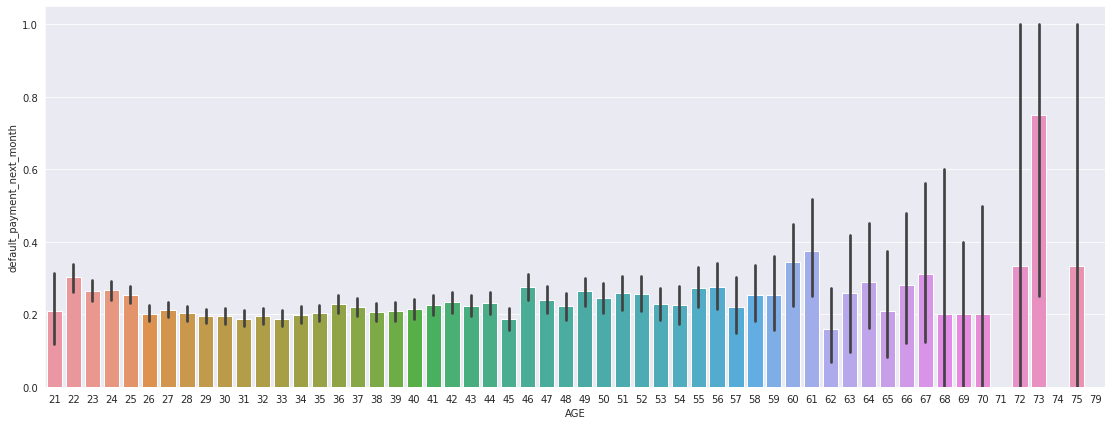

In [ ]:
plt.figure(figsize=(19,7))  # set the plot size
sns.barplot(x = 'AGE', y = 'default_payment_next_month', data = credit_data)
plt.show()

#### Now We Renaming the Column as Our Data discription ( X6 - X11 from April to September, 2005 )

In [ ]:
credit_data.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)  #rename the column from pay0-pay6 
credit_data.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)  #rename the column from Bill_amt0-Bill_amt6
credit_data.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)  #rename the column from pay_amt0-pay_amt6
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_SEPT                    30000 non-null  int64
 7   PAY_AUG                     30000 non-null  int64
 8   PAY_JUL                     30000 non-null  int64
 9   PAY_JUN                     30000 non-null  int64
 10  PAY_MAY                     30000 non-null  int64
 11  PAY_APR                     30000 non-null  int64
 12  BILL_AMT_SEPT               30000 non-null  int64
 13  BILL_AMT_AUG                30000 non-null  int64
 14  BILL_A

In [ ]:
#check the first five row of our dataset
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Now we visualize the previous payment status

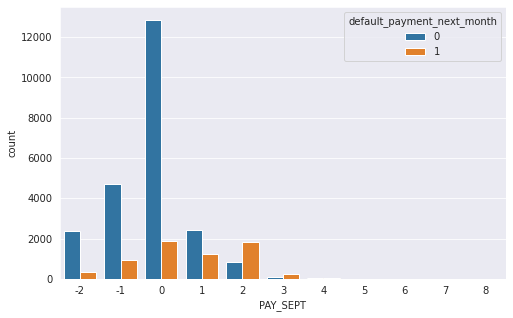

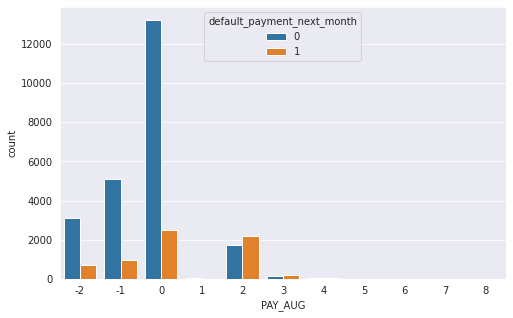

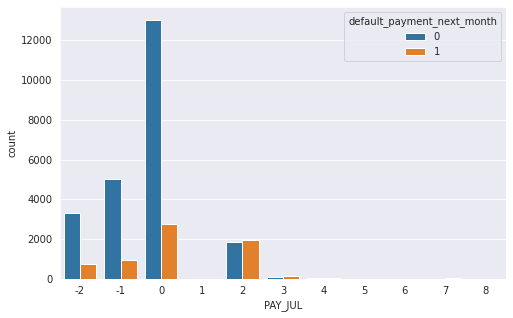

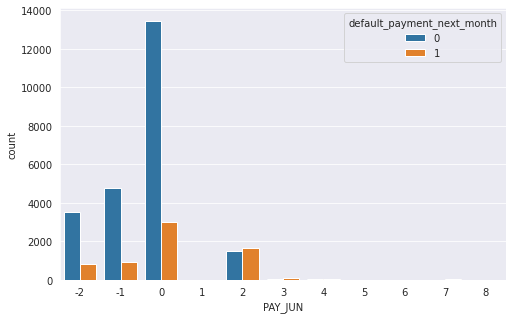

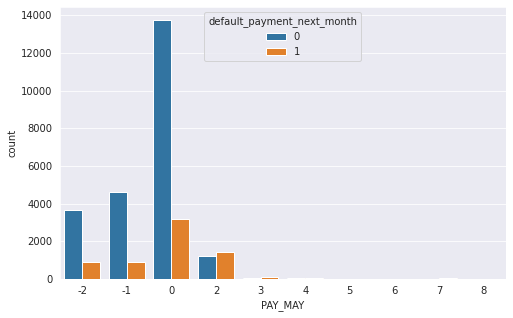

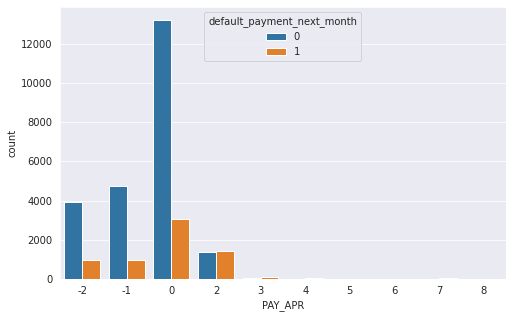

In [ ]:
list_of_pre_payment = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']  # we store payment column in single list variable
for dataa in list_of_pre_payment:
  plt.figure(figsize=(8,5))
  sns.countplot(x = dataa, hue = 'default_payment_next_month', data = credit_data)

#### Now We Calculate the Total Amount using Pairplot

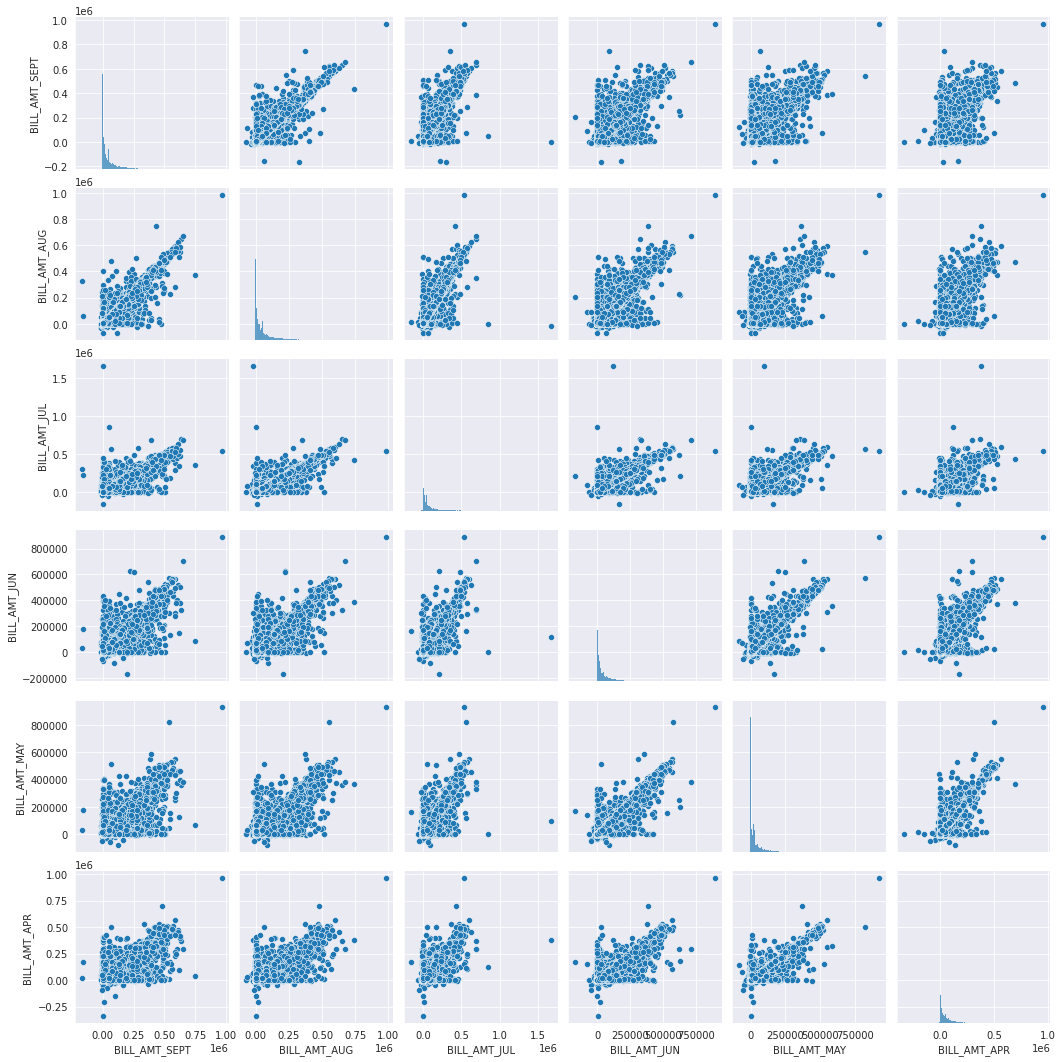

In [ ]:
#Now we add all bill amount variable in a single variable and then plot it in 
total_amount_bill = credit_data[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]
sns.pairplot(data = total_amount_bill)

#### Now we visualize the paid amount status

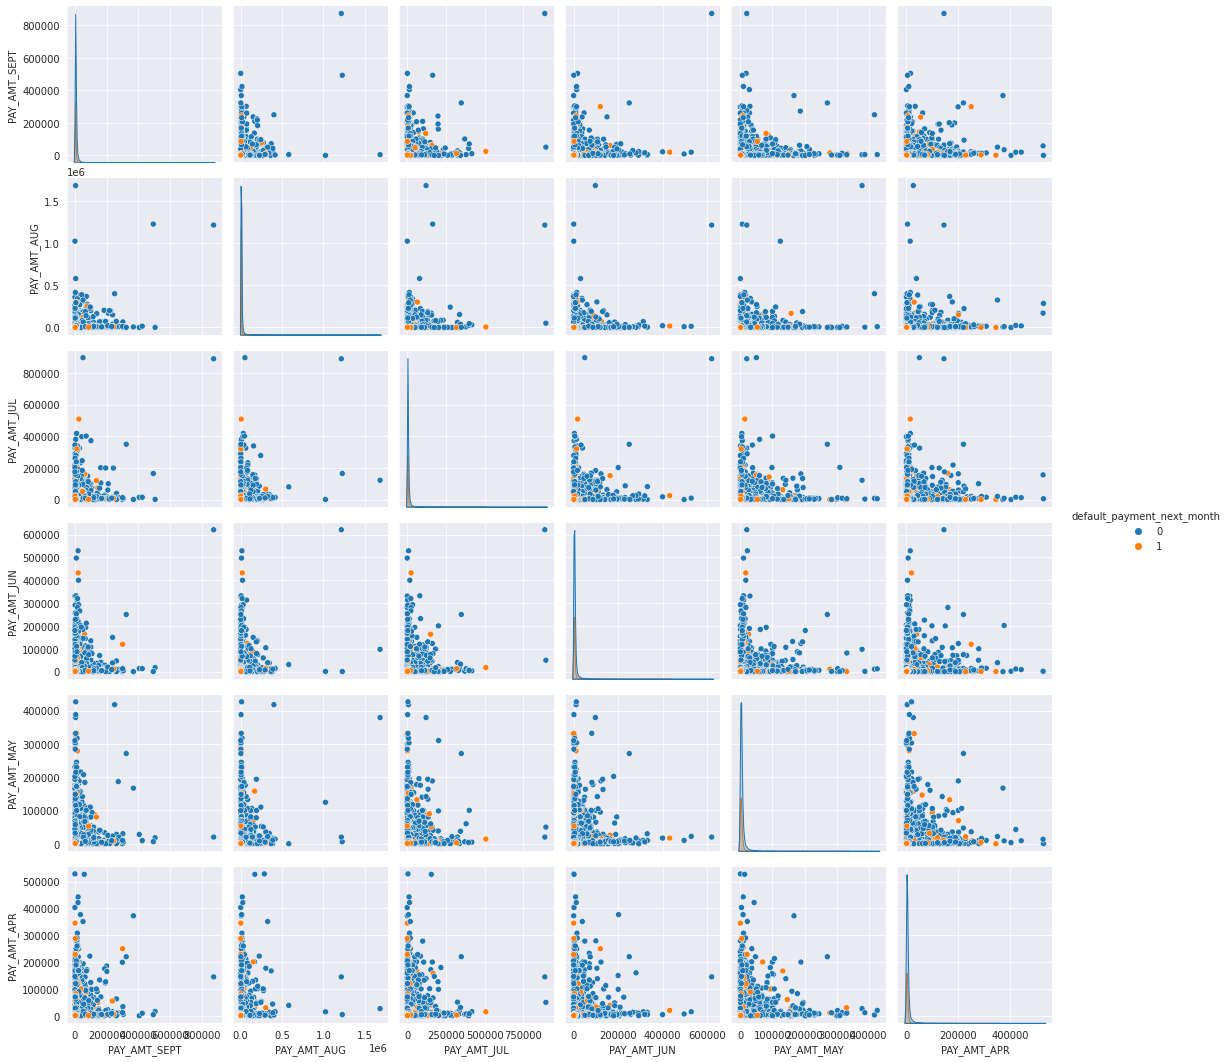

In [ ]:
#Now we add all paid amount variable in a single variable and then plot it in  
paid_amount_bill = credit_data[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'default_payment_next_month']]
sns.pairplot(data = paid_amount_bill, hue='default_payment_next_month')

#### Corelation between dependent and independent variable.

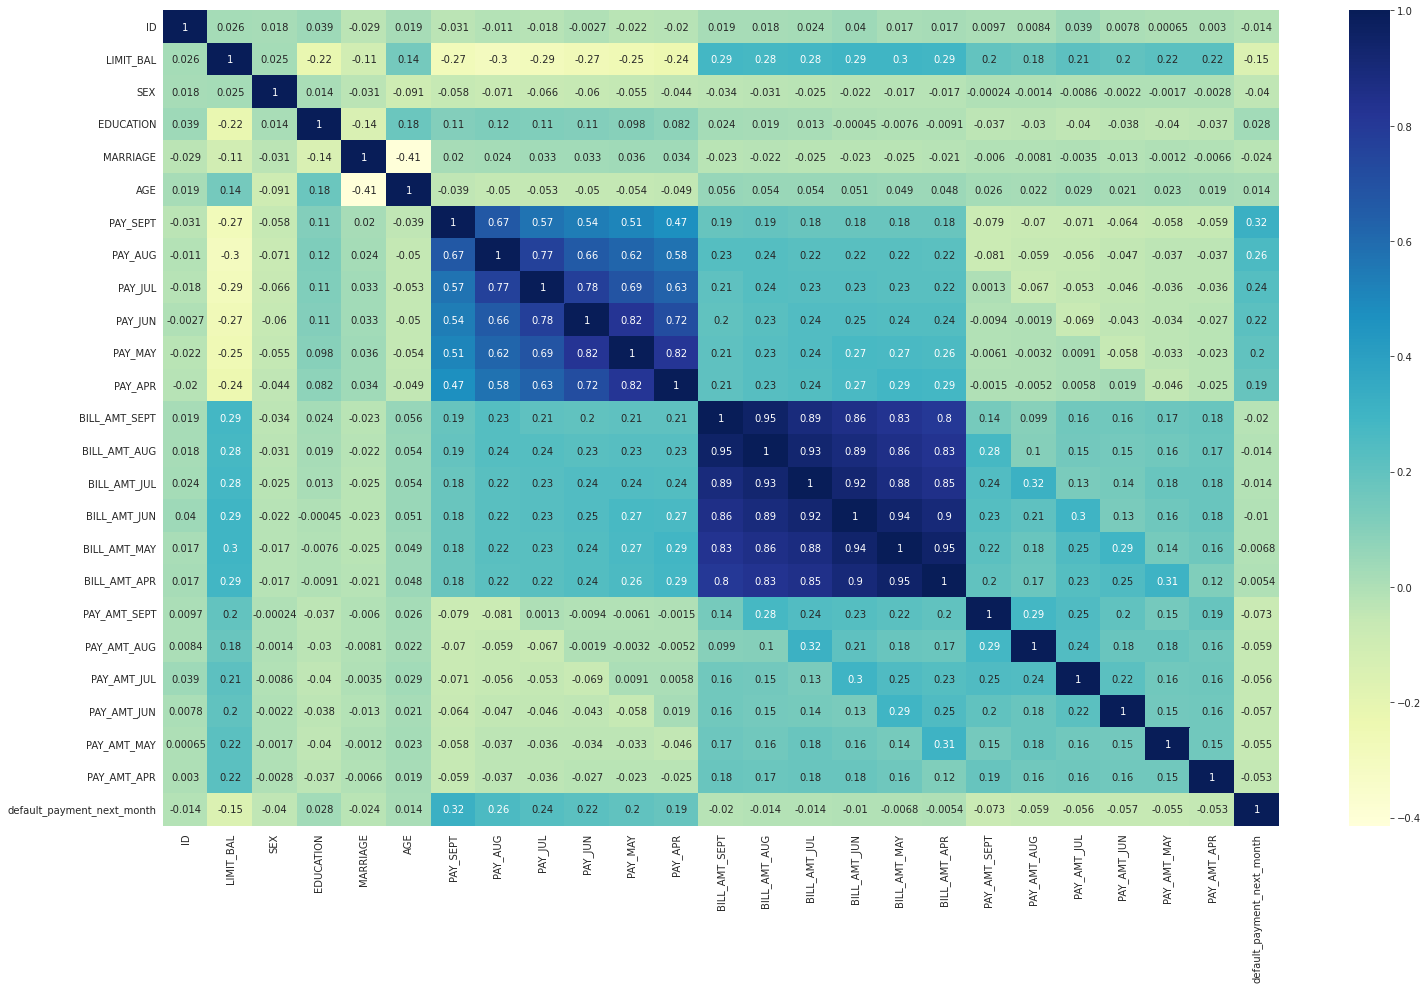

In [ ]:
# Show the corelation between dependent and independent variable using Heatmap
plt.figure(figsize=(25,15))  
corr=credit_data.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')

#### Smote

In [ ]:
#import the module for performing smote operation
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# Let's Fit Predictor and Target Variable
x_smote, y_smote = smote.fit_resample(credit_data.iloc[:,0:-1], credit_data['default_payment_next_month'])
print('The Original Shape of Dataset is :-', len(credit_data))
print('The Resampled Shape of Dataset is :-', len(y_smote))

The Original Shape of Dataset is :- 30000
The Resampled Shape of Dataset is :- 46728


In [ ]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,25041,50000,1,1,2,33,1,0,0,0,...,7961,4302,5554,5443,1501,2003,917,1383,1323,550
46724,24305,140000,1,2,1,32,0,0,0,0,...,58405,59411,60426,61573,2303,2335,2166,2187,2161,3390
46725,8512,254382,2,1,1,29,1,1,1,0,...,29960,32767,21028,13275,30153,292,3580,2696,1428,1584
46726,7211,180000,2,2,2,31,0,0,0,0,...,175538,134059,133388,126734,9808,9037,2419,5116,4871,4396


In [ ]:
y_smote

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: default_payment_next_month, Length: 46728, dtype: int64

In [ ]:
column = list(credit_data.columns)
column

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_SEPT',
 'PAY_AUG',
 'PAY_JUL',
 'PAY_JUN',
 'PAY_MAY',
 'PAY_APR',
 'BILL_AMT_SEPT',
 'BILL_AMT_AUG',
 'BILL_AMT_JUL',
 'BILL_AMT_JUN',
 'BILL_AMT_MAY',
 'BILL_AMT_APR',
 'PAY_AMT_SEPT',
 'PAY_AMT_AUG',
 'PAY_AMT_JUL',
 'PAY_AMT_JUN',
 'PAY_AMT_MAY',
 'PAY_AMT_APR',
 'default_payment_next_month']

In [ ]:
column.pop()

'default_payment_next_month'

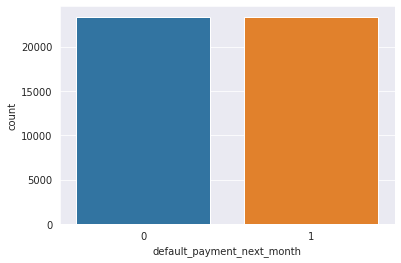

In [ ]:
balance_data = pd.DataFrame(x_smote, columns=column)
balance_data['default_payment_next_month'] = y_smote
#plot the count plot after smote
sns.countplot('default_payment_next_month', data = balance_data)

In [ ]:
balance_data[balance_data['default_payment_next_month']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,25041,50000,1,1,2,33,1,0,0,0,...,4302,5554,5443,1501,2003,917,1383,1323,550,1
46724,24305,140000,1,2,1,32,0,0,0,0,...,59411,60426,61573,2303,2335,2166,2187,2161,3390,1
46725,8512,254382,2,1,1,29,1,1,1,0,...,32767,21028,13275,30153,292,3580,2696,1428,1584,1
46726,7211,180000,2,2,2,31,0,0,0,0,...,134059,133388,126734,9808,9037,2419,5116,4871,4396,1


#### Feature Engineering

In [ ]:
## First we Copy the dataset
copy_credit_data = balance_data.copy()

In [ ]:
## Let's Sum the Payment Value
copy_credit_data['total_Payement_Value'] = copy_credit_data['PAY_SEPT'] + copy_credit_data['PAY_AUG'] + copy_credit_data['PAY_JUL'] + copy_credit_data['PAY_JUN'] + copy_credit_data['PAY_MAY'] + copy_credit_data['PAY_APR']

In [ ]:
## Check the correlation by using Mean
copy_credit_data.groupby('default_payment_next_month')['total_Payement_Value'].mean()

default_payment_next_month
0   -1.980140
1    1.673814
Name: total_Payement_Value, dtype: float64

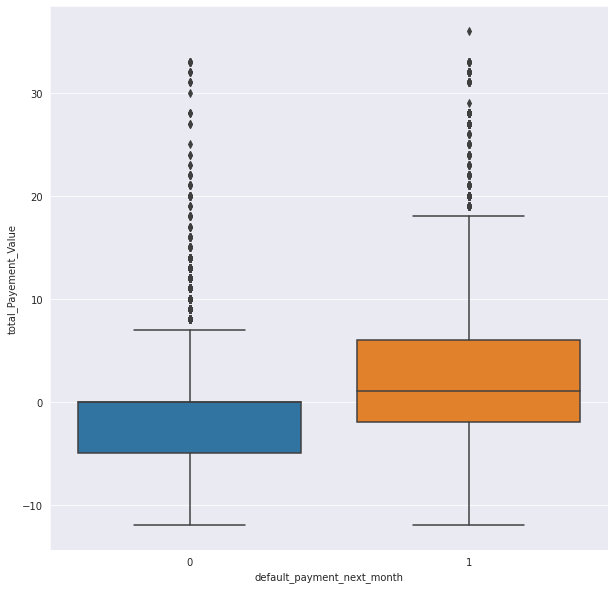

In [ ]:
#plotting the box plot 
plt.figure(figsize=(10,10))
sns.boxplot(data = copy_credit_data, x = 'default_payment_next_month', y = 'total_Payement_Value') 

In [ ]:
## For calculating the sum of the total bill amount & then substract it from the total amount paid we just define a new column 
copy_credit_data['Amt_Dues'] = (copy_credit_data['BILL_AMT_APR']+copy_credit_data['BILL_AMT_MAY']+copy_credit_data['BILL_AMT_JUN']+copy_credit_data['BILL_AMT_JUL']+copy_credit_data['BILL_AMT_SEPT'])-(copy_credit_data['PAY_AMT_APR']+copy_credit_data['PAY_AMT_MAY']+copy_credit_data['PAY_AMT_JUN']+copy_credit_data['PAY_AMT_JUL']+copy_credit_data['PAY_AMT_AUG']+copy_credit_data['PAY_AMT_SEPT'])

In [ ]:
# we calculate the correletion for checking the mean
copy_credit_data.groupby('default_payment_next_month')['Amt_Dues'].mean()

default_payment_next_month
0    187742.051532
1    194267.177752
Name: Amt_Dues, dtype: float64

In [ ]:
copy_credit_data.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},
                        'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 0 : 'others'},
                        'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
# Lets check first five rows of our new copied data
copy_credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month,total_Payement_Value,Amt_Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,3913
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,10352
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,76608
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,174713
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,44620


#### One Hot Encoding

Basically One hot encoding is one Process of converting data to prepare it for an algorithm for get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector

In [ ]:
#First we Get Dummies using pandas library
copy_credit_data = pd.get_dummies(copy_credit_data,columns=['EDUCATION','MARRIAGE'])

In [ ]:
copy_credit_data = pd.get_dummies(copy_credit_data,columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [ ]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
copy_credit_data = copy_credit_data.replace(encoders_nums)

In [ ]:
copy_credit_data.drop('ID',axis = 1, inplace = True)

In [ ]:
copy_credit_data.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'default_payment_next_month',
       'total_Payement_Value', 'Amt_Dues', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_others', 'EDUCATION_university', 'MARRIAGE_0',
       'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single', 'PAY_SEPT_-1',
       'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4',
       'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_AUG_-1',
       'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4',
       'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JUL_-1',
       'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4',
       'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8', 'PA

In [ ]:
copy_credit_data.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0


#### Now we Start Model Buliding For

In [ ]:
# Import the Packages 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


##### Logistic Regression

In [ ]:
# create a sample copy for logistic regression
credit_for_lr = copy_credit_data.copy() 

In [ ]:
#show the first 5 column
credit_for_lr.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# First we Train the Test spilt Data 
#define the X and y value
X = credit_for_lr.drop(['default_payment_next_month','total_Payement_Value','Amt_Dues'],axis=1)
y = credit_for_lr['default_payment_next_month']

In [ ]:
columns = X.columns

In [ ]:
#Then we standardise the x value with the help of satandardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Then we split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
#Then we set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [ ]:
#Then we fit the parameter 
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [ ]:
optimized_clf = grid_lr_clf.best_estimator_

In [ ]:
grid_lr_clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [ ]:
grid_lr_clf.best_score_

0.7514614340087623

In [ ]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [ ]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
lr_train_accuracy = accuracy_score(train_class_preds,y_train)
lr_test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy For the train data is ", lr_train_accuracy)
print("The accuracy For the test data is ", lr_test_accuracy)

The accuracy For the train data is  0.7529625962244866
The accuracy For the test data is  0.7507295246741457


In [ ]:
#Then we print the accuracy,precission,recall,f1,roc_score 
lr_test_accuracy = accuracy_score(test_class_preds,y_test)
lr_test_precision_score = precision_score(test_class_preds,y_test)
lr_test_recall_score = recall_score(test_class_preds,y_test)
lr_test_f1_score = f1_score(test_class_preds,y_test)
lr_test_roc_score = roc_auc_score(test_class_preds,y_test)

print("The accuracy For the test data is ", lr_test_accuracy)
print("The precision For the test data is ", lr_test_precision_score)
print("The recall For the test data is ", lr_test_recall_score)
print("The f1 For the test data is ", lr_test_f1_score)
print("The roc_score For the test data is ", lr_test_roc_score)

The accuracy For the test data is  0.7507295246741457
The precision For the test data is  0.6844357976653697
The recall For the test data is  0.7890251196172249
The f1 For the test data is  0.7330184747881651
The roc_score For the test data is  0.755213349915105


From the above Calculation we find out :- 
* The accuracy For the test data is  0.752156150703586
* The precision For the test data is  0.6881971465629053
* The recall For the test data is  0.7891136228435455
* The f1 For the test data is  0.7352085354025218
* The roc_score For the test data is  0.7563482337513117

In [ ]:
# Lets Find Out Confusuion Matrix For Both Train & Test Set
Lr_CM = confusion_matrix(y_train, train_class_preds)
print(Lr_CM)

[[12797  2856]
 [ 4878 10776]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

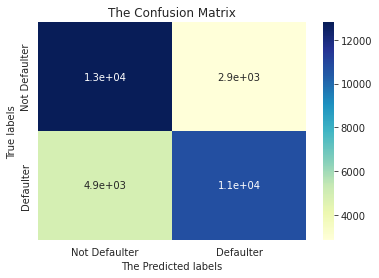

In [ ]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(Lr_CM, annot=True, cmap='YlGnBu', ax = ax)
ax.set_xlabel('The Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('The Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Let's Check Feature Importance
feature_imp = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [ ]:
feature_imp = feature_imp.sort_values(by = 'Importance', ascending=False)[:10]

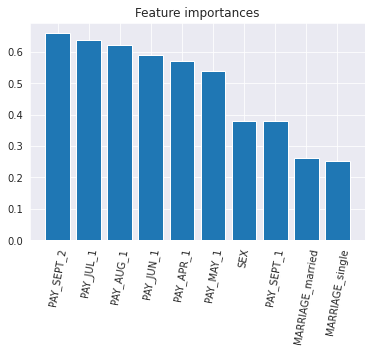

In [ ]:
# Then we Visualize it
plt.bar(height=feature_imp['Importance'], x= feature_imp['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances")
plt.show()

From the above visualization we can say that the PAY_JUL_1,PAY_MAY_1,PAY_APR_1 are make impact on the dependent variable.

Then we Find ROC AUC curve
* AUC - ROC curve is the performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

In [ ]:
lr_y_preds_proba = optimized_clf.predict_proba(X_test)[::,1]

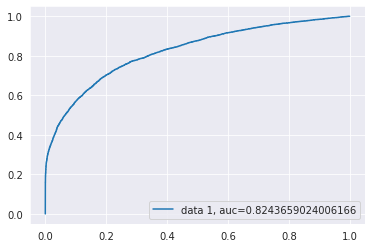

In [ ]:
#plot the graph
y_predc_prob = lr_y_preds_proba
fpr, tpr, _ = roc_curve(y_test,  y_predc_prob)
auc = roc_auc_score(y_test, y_predc_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### Random Forest Classifiers

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
#Then we define the X and y value
X = copy_credit_data.drop(['default_payment_next_month','total_Payement_Value','Amt_Dues'],axis=1)
y = copy_credit_data['default_payment_next_month']

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Then we Find out the predicted classes
pr_train_class = rf_clf.predict(X_train)
pr_test_class = rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
rf_train_accuracy = accuracy_score(pr_train_class,y_train)
rf_test_accuracy = accuracy_score(pr_test_class,y_test)
print("The accuracy For the Train data is ", rf_train_accuracy)
print("The accuracy For the Test data is ", rf_test_accuracy) 

The accuracy For the Train data is  0.9993292234963427
The accuracy For the Test data is  0.8328902146423708


In [ ]:
rf_test_accuracy = accuracy_score(pr_test_class,y_test)
rf_test_precision_score = precision_score(pr_test_class,y_test)
rf_test_recall_score = recall_score(pr_test_class,y_test)
rf_test_f1_score = f1_score(pr_test_class,y_test)
rf_test_roc_score = roc_auc_score(pr_test_class,y_test)

print("The accuracy For the Test data is ", rf_test_accuracy)
print("The precision For the Test data is ", rf_test_precision_score)
print("The recall For the Test data is ", rf_test_recall_score)
print("The f1 For the Test data is ", rf_test_f1_score)
print("The roc_score For the Test data is ", rf_test_roc_score)

The accuracy For the Test data is  0.8328902146423708
The precision For the Test data is  0.8012970168612192
The recall For the Test data is  0.8553232728783055
The f1 For the Test data is  0.8274291836871359
The roc_score For the Test data is  0.8342242126772597


From the above Calculation we find out :- 
* The accuracy For the Test data is  0.8376240191946047
* The precision For the Test data is  0.8086900129701686
* The recall For the Test data is  0.8583425110132159
* The f1 For the Test data is  0.832776813142781
* The roc_score For the Test data is  0.8387581134200566

In [ ]:
#set the parmeter
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [ ]:
#fit the parameter
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
rf_grid.best_score_

0.8187626664766446

In [ ]:
rf_grid.best_params_

{'max_depth': 30, 'n_estimators': 150}

In [ ]:
optimal_rf_clf = rf_grid.best_estimator_
pred_train_class = optimal_rf_clf.predict(X_train) # we get the predicted classes for train set 
pred_test_class = optimal_rf_clf.predict(X_test) # we get the predicted classes for test set

In [ ]:
# Get the accuracy scores
rf_train_accuracy = accuracy_score(pred_train_class,y_train)
rf_test_accuracy = accuracy_score(pred_test_class,y_test)

print("The accuracy for the Train data is ", rf_train_accuracy)
print("The accuracy for the Test data is ", rf_test_accuracy)

The accuracy for the Train data is  0.998626505254416
The accuracy for the Test data is  0.8362622398028662


In [ ]:
rf_test_accuracy = accuracy_score(pred_test_class,y_test)
rf_test_precision_score = precision_score(pred_test_class,y_test)
rf_test_recall_score = recall_score(pred_test_class,y_test)
rf_test_f1_score = f1_score(pred_test_class,y_test)
rf_test_roc_score = roc_auc_score(pred_test_class,y_test)

print("The Accuracy For the test data is ", rf_test_accuracy)
print("The Precision Score For the test data is ", rf_test_precision_score)
print("The Recall Score For the test data is ", rf_test_recall_score)
print("The f1 Score For the test data is ", rf_test_f1_score)
print("The Roc Score For the test data is ", rf_test_roc_score)

The Accuracy For the test data is  0.8362622398028662
The Precision Score For the test data is  0.8046692607003891
The Recall Score For the test data is  0.8589228852277447
The f1 Score For the test data is  0.8309114042724168
The Roc Score For the test data is  0.83760977147457


In [ ]:
# Lets Find Out Confusuion Matrix For Both Train & Test Set
rf_CM = confusion_matrix(y_train, train_class_preds)
print(rf_CM)

[[12797  2856]
 [ 4878 10776]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

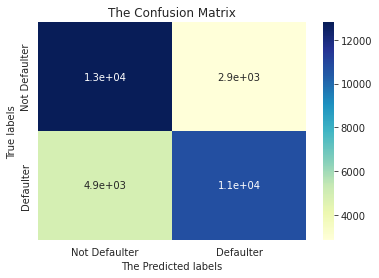

In [ ]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(rf_CM, annot=True, ax = ax, cmap='YlGnBu')
ax.set_xlabel('The Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('The Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

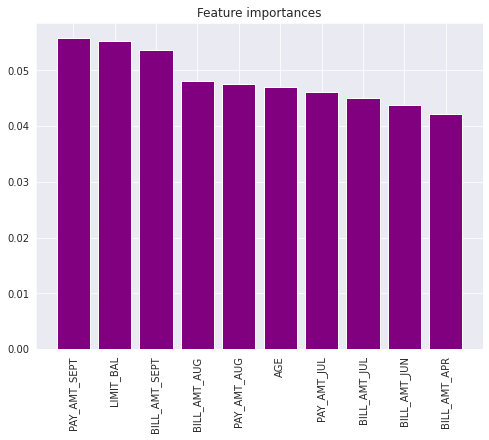

In [ ]:
# Let's Check Feature Importance
rf_feature_importances = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(8,6))
plt.title("Feature importances")
plt.bar(rf_feature_importances.index, rf_feature_importances['importance_rf'],
        color="purple",  align="center")
plt.xticks(rf_feature_importances.index, rotation = 90)
plt.show()

Then we Find ROC AUC curve
* AUC - ROC curve is the performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

In [ ]:
pred_train_class = optimal_rf_clf.predict(X_train)
pred_test_class = optimal_rf_clf.predict(X_test)

In [ ]:
rf_y_preds_proba = optimal_rf_clf.predict_proba(X_test)[::,1]

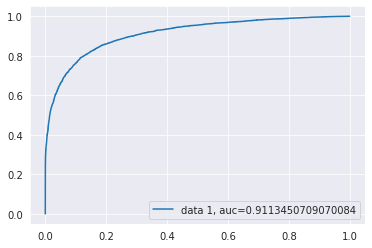

In [ ]:
# plot the graph
import sklearn.metrics as metrics
y_pred_prob = rf_y_preds_proba
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### Support Vector Classifier

It is a supervised machine learning algorithm basically used for classification tasks. SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes.

In [ ]:
#import the packages
from sklearn.model_selection import GridSearchCV

# Then we Copy the data for SVC
svc_credit_data = copy_credit_data.copy()

# # defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],   
              'kernel': ['rbf']} 

In [ ]:
#define the X and y value
X = svc_credit_data.drop(['default_payment_next_month','total_Payement_Value','Amt_Dues'],axis=1)
y = svc_credit_data['default_payment_next_month']

In [ ]:
#standardise the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
#Then we set & fit the parmeter 
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [ ]:
optimal_SVC_clf = grid_clf.best_estimator_

In [ ]:
grid_clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
grid_clf.best_score_

0.7743956011126817

In [ ]:
# Next we get the predicted classes
pred_train_class = optimal_SVC_clf.predict(X_train)
pred_test_class = optimal_SVC_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
svc_train_accuracy = accuracy_score(train_class_preds,y_train) # Accuracy Score for the train data
svc_test_accuracy = accuracy_score(test_class_preds,y_test) # Accuracy Score for the test data
print("The Accuracy For the Train data is :-", svc_train_accuracy)
print("The Accuracy For the Test data is :-", svc_test_accuracy)

The Accuracy For the Train data is :- 0.7529625962244866
The Accuracy For the Test data is :- 0.7507295246741457


In [ ]:
svc_test_accuracy = accuracy_score(test_class_preds,y_test)
svc_test_precision_score = precision_score(test_class_preds,y_test)
svc_test_recall_score = recall_score(test_class_preds,y_test)
svc_test_f1_score = f1_score(test_class_preds,y_test)
svc_test_roc_score = roc_auc_score(test_class_preds,y_test)
print("The Accuracy for the test data is ", svc_test_accuracy)
print("The Precision For the test data is ", svc_test_precision_score)
print("The Recall for the test data is ", svc_test_recall_score)
print("The f1 for the test data is ", svc_test_f1_score)
print("The Roc Score for the test data is ", svc_test_roc_score)

The Accuracy for the test data is  0.7507295246741457
The Precision For the test data is  0.6844357976653697
The Recall for the test data is  0.7890251196172249
The f1 for the test data is  0.7330184747881651
The Roc Score for the test data is  0.755213349915105


In [ ]:
# Lets Find Out Confusuion Matrix For Both Train & Test Set
cm_label = ['Not Defaulter', 'Defaulter']
svc_cm = confusion_matrix(y_train, train_class_preds)
print(svc_cm)

[[12797  2856]
 [ 4878 10776]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

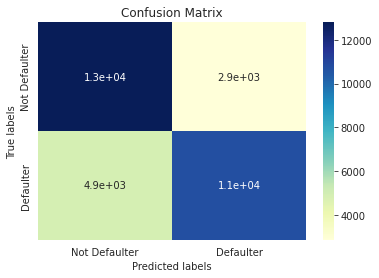

In [ ]:
ax= plt.subplot()
sns.heatmap(svc_cm, annot=True, ax = ax, cmap='YlGnBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
optimal_SVC_clf

SVC(C=10, probability=True)

In [ ]:
pred_train_class = optimal_SVC_clf.predict(X_train) # get the predicted classes for train data
pred_test_class = optimal_SVC_clf.predict(X_test) # get the predicted classes for test data

Then we Find ROC AUC curve
* AUC - ROC curve is the performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

In [ ]:
svc_y_pred_prob = optimal_SVC_clf.predict_proba(X_test)[::,1]

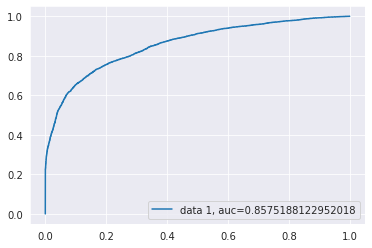

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  svc_y_pred_prob)
auc = roc_auc_score(y_test, svc_y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### XGBoost Classifiers 

In [ ]:
#Import Required Libraries For XGBoost
import lightgbm as lgb 
import xgboost as xgb

In [ ]:
train_data=xgb.DMatrix(X_train,label=y_train)
test_data=xgb.DMatrix(X_test)

In [ ]:
# set the parameter and next we training our model
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [ ]:
#train the model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,train_data,num_round) 
stop = datetime.now()

In [ ]:
# Lets check the execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=6, microseconds=753132)

In [ ]:
prob_train_class_preds=xg.predict(train_data) #model prediction for train set 
prob_test_class_preds=xg.predict(test_data) #model prediction for train set

In [ ]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(prob_train_class_preds)):
  if prob_train_class_preds[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(prob_test_class_preds)):
  if prob_test_class_preds[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [ ]:
prob_test_class_preds[:20]

array([0.26467848, 0.23253505, 0.4039086 , 0.22461566, 0.24308036,
       0.31192333, 0.19012104, 0.41500363, 0.6241873 , 0.3011317 ,
       0.95256364, 0.30595386, 0.8985444 , 0.5284206 , 0.58897454,
       0.27458155, 0.83737737, 0.43694407, 0.54093057, 0.28237826],
      dtype=float32)

In [ ]:
test_class_preds[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0]

In [ ]:
print("Length of Y Train is :-",len(y_train))
print("Length of Train Class Prediction is :-",len(train_class_preds))

Length of Y Train is :- 31307
Length of Train Class Prediction is :- 31307


###### Model Evaluation

In [ ]:
# Accuracy Score
xgb_train_accuracy = accuracy_score(train_class_preds,y_train)
xgb_test_accuracy = accuracy_score(test_class_preds,y_test)
print("The Accuracy For the Train Data is ", xgb_train_accuracy)
print("The Accuracy For the Test Data is ", xgb_test_accuracy)

The Accuracy For the Train Data is  0.7846807423259974
The Accuracy For the Test Data is  0.7748524738992283


In [ ]:
xgb_test_accuracy = accuracy_score(test_class_preds,y_test)
xgb_test_precision = precision_score(test_class_preds,y_test)
xgb_test_recall_score = recall_score(test_class_preds,y_test)
xgb_test_f1_score = f1_score(test_class_preds,y_test)
xgb_test_roc_score = roc_auc_score(test_class_preds,y_test)
print("The accuracy For the test data is ", xgb_test_accuracy)
print("The precision For the test data is ", xgb_test_precision)
print("The recall For the test data is ", xgb_test_recall_score)
print("The f1 For the test data is ", xgb_test_f1_score)
print("The Roc Score For the train data is ", xgb_test_roc_score)

The accuracy For the test data is  0.7748524738992283
The precision For the test data is  0.6985732814526588
The recall For the test data is  0.8243036424854606
The f1 For the test data is  0.7562482448750351
The Roc Score For the train data is  0.7813990362759249


In [ ]:
# Confusion Matrix
xg_cm = confusion_matrix(y_train, train_class_preds)
print(xg_cm)

[[13547  2106]
 [ 4635 11019]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

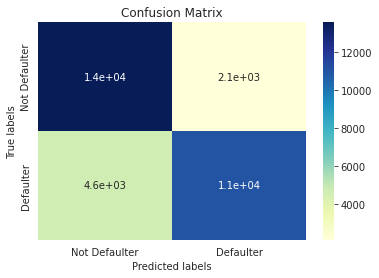

In [ ]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(xg_cm, annot=True, ax = ax, cmap='YlGnBu') 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#Tuning Hyperparameter
#import the packages
from xgboost import  XGBClassifier

In [ ]:
#defining the value of x and y
X = copy_credit_data.drop(['default_payment_next_month','total_Payement_Value','Amt_Dues'],axis=1)
y = copy_credit_data['default_payment_next_month']

In [ ]:
#Then we split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=140, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [ ]:
gsearch1.best_score_

0.8197528654665528

In [ ]:
optimal_xgb = gsearch1.best_estimator_

In [ ]:
pred_train_class = optimal_xgb.predict(X_train) # get the prediction for train class
pred_test_class = optimal_xgb.predict(X_test) # get the prediction for test class

In [ ]:
#Now we get the accuracy scores
xgb_train_accuracy = accuracy_score(pred_train_class,y_train)
xgb_test_accuracy = accuracy_score(pred_test_class,y_test)

print("The Accuracy For the Train data is :-", xgb_train_accuracy)
print("The Accuracy For the Test data is :-", xgb_test_accuracy)

The Accuracy For the Train data is :- 0.8995432331427476
The Accuracy For the Test data is :- 0.8254328513066598


In [ ]:
xgb_test_accuracy = accuracy_score(pred_test_class,y_test)
xgb_test_precision = precision_score(pred_test_class,y_test)
xgb_test_recall_score = recall_score(pred_test_class,y_test)
xgb_test_f1_score = f1_score(pred_test_class,y_test)
xgb_test_roc_score = roc_auc_score(pred_test_class,y_test)
print("The Accuracy for the test data is :-", xgb_test_accuracy)
print("The precision for the test data is :-", xgb_test_precision)
print("The recall for the test data is :-", xgb_test_recall_score)
print("The f1 for the test data is :-", xgb_test_f1_score)
print("The Roc Score on train data is :-", xgb_test_roc_score)

The Accuracy for the test data is :- 0.8254328513066598
The precision for the test data is :- 0.7830090791180285
The recall for the test data is :- 0.8555839002267573
The f1 for the test data is :- 0.8176892861980226
The Roc Score on train data is :- 0.8277919501133787


In [ ]:
pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10].T

,PAY_AUG_1,PAY_JUL_1,PAY_SEPT_2,PAY_AUG_2,PAY_JUN_1,PAY_MAY_1,PAY_APR_1,SEX,MARRIAGE_married,PAY_SEPT_1
importance_xgb,0.139373,0.095776,0.082614,0.0709,0.054277,0.050985,0.038238,0.032235,0.031997,0.031206


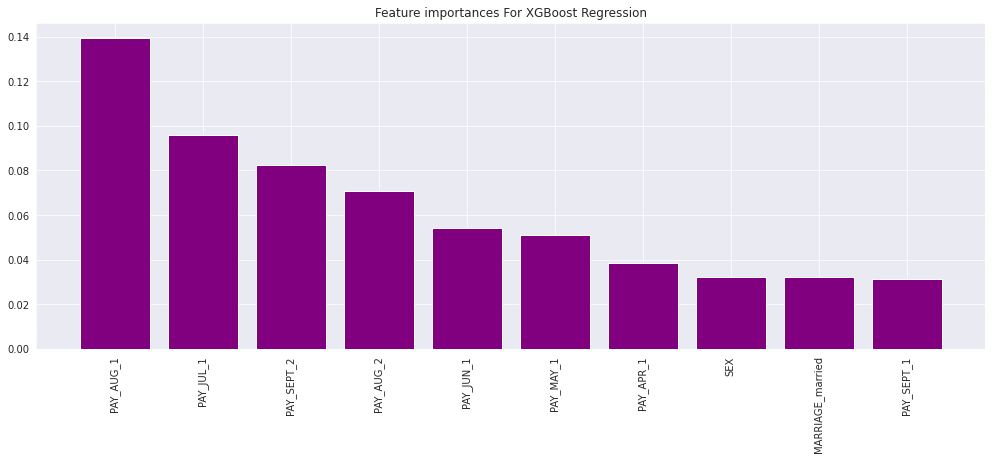

In [ ]:
# Then we move on Feature Importance
xgb_feature_importances = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]                          
plt.subplots(figsize=(17,6))
plt.title("Feature importances For XGBoost Regression")
plt.bar(xgb_feature_importances.index, xgb_feature_importances['importance_xgb'],
        color="purple",  align="center")
plt.xticks(xgb_feature_importances.index, rotation = 90)
plt.show()

Then we Find ROC AUC curve
* AUC - ROC curve is the performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

In [ ]:
xgb_pred_prob_y = optimal_xgb.predict_proba(X_test)[::,1]

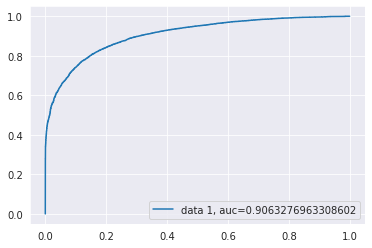

In [ ]:
prob_pred_y = xgb_pred_prob_y
fpr, tpr, _ = metrics.roc_curve(y_test,  prob_pred_y)
auc = metrics.roc_auc_score(y_test, prob_pred_y)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### Let's Evaluate the Model

In [ ]:
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [ ]:
# we simply create a table of all model score for making comparision 
classifiers_models = ['Logistic Regression', 'Support Vector Classifier', 'Random Forest Classifier', 'Xgboost Classifiers']
train_accuracy_list = [lr_train_accuracy, svc_train_accuracy, rf_train_accuracy, xgb_train_accuracy]
test_accuracy_list = [lr_test_accuracy, svc_test_accuracy, rf_test_accuracy, xgb_test_accuracy]
precision_score_list = [lr_test_precision_score, svc_test_precision_score, rf_test_precision_score, xgb_test_precision]
recall_score_list = [lr_test_recall_score, svc_test_recall_score, rf_test_recall_score, xgb_test_recall_score]
f1_score_list = [lr_test_f1_score, svc_test_f1_score, rf_test_f1_score, xgb_test_f1_score]

# Let's Add Our Result in Single DataFrame
pd.DataFrame({'Classifiers':classifiers_models, 'Train Accuracy': train_accuracy_list, 'Test Accuracy': test_accuracy_list, 'Precision Score': precision_score_list, 'Recall Score': recall_score_list, 'F1 Score': f1_score_list })


,Classifiers,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.752963,0.750730,0.684436,0.789025,0.733018
1,Support Vector Classifier,0.752963,0.750730,0.684436,0.789025,0.733018
2,Random Forest Classifier,0.998627,0.836262,0.804669,0.858923,0.830911
3,Xgboost Classifiers,0.899543,0.825433,0.783009,0.855584,0.817689


* From the Above Table Data we observe Random Forest Classifier Perform Best with the comparision of other models.

##### Ploting  ROC AUC For all Models

In [ ]:
prob_classifiers = [(optimized_clf, lr_y_preds_proba), 
               (optimal_rf_clf, rf_y_preds_proba), 
               (optimal_SVC_clf,svc_y_pred_prob),
               (optimal_xgb, xgb_pred_prob_y)]

#Let's Define a Column For Store the Result
result = pd.DataFrame(columns=['Classifiers', 'False Positive Rate','True Positive Rate','AUC'])

# Train the models and record the results
for pair in prob_classifiers:
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    result = result.append({'Classifiers':pair[0].__class__.__name__,
                                        'False Positive Rate':fpr, 
                                        'True Positive Rate':tpr, 
                                        'AUC':auc}, ignore_index=True)
# Set Classifiers as Index
result.set_index('Classifiers', inplace=True)


In [ ]:
result

,False Positive Rate,True Positive Rate,AUC
Classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.00012968486577616392, 0.0001...","[0.0, 0.00012970168612191958, 0.09779507133592...",0.824366
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0383916990920882, 0.03929961089494163,...",0.911345
SVC,"[0.0, 0.0, 0.0, 0.00012968486577616392, 0.0001...","[0.0, 0.00012970168612191958, 0.13826199740596...",0.857519
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00012970168612191958, 0.00363164721141...",0.906328


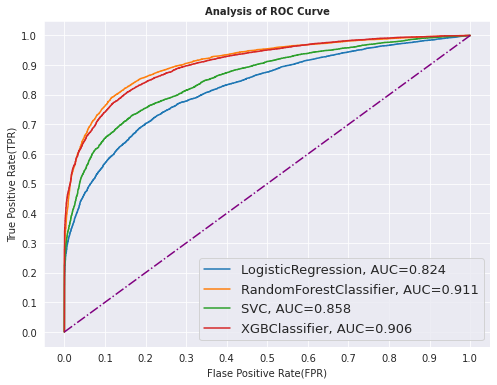

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result.index:
    plt.plot(result.loc[i]['False Positive Rate'], 
             result.loc[i]['True Positive Rate'], 
             label="{}, AUC={:.3f}".format(i, result.loc[i]['AUC']))
    
plt.plot([0,1], [0,1], color='Purple', linestyle='-.')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate(FPR)", fontsize=10)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate(TPR)", fontsize=10)

plt.title('Analysis of ROC Curve', fontweight='bold', fontsize=10)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

##### Model Recommendation

In [ ]:
# Compute precision, recall and threshold of Random Forest with recommend recall score 0.8
precisions, recalls, threshold = precision_recall_curve(y_test, y_pred_prob)

recalls_08 = recalls[np.argmin(recalls >= 0.80)]    
precision_08 = precisions[np.argmin(recalls >= 0.80)]
threshold_recall_08 = threshold[np.argmin(recalls >= 0.80)]

threshold = np.append(threshold, 1)

recalls_08, precision_08, threshold_recall_08


(0.7998702983138781, 0.8633627327453451, 0.5069871794871794)

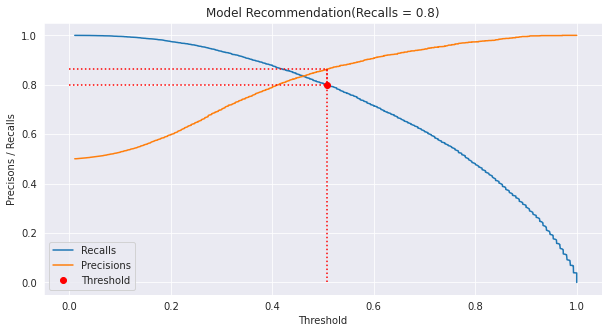

In [ ]:
# Let's Visualize
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(threshold, recalls, label='Recalls')
ax.plot(threshold, precisions, label='Precisions')

ax.plot([threshold_recall_08, threshold_recall_08], [precision_08, recalls_08], "r:" )
ax.plot([threshold_recall_08, threshold_recall_08], [0, precision_08], "r:")
ax.plot([0, threshold_recall_08], [precision_08, precision_08], "r:")
ax.plot([0, threshold_recall_08], [recalls_08, recalls_08], "r:")
ax.plot([threshold_recall_08], [recalls_08], "ro", label='Threshold')

ax.set_xlabel('Threshold')
ax.set_ylabel('Precisons / Recalls')
ax.legend(loc=3, fontsize=10)
plt.title('Model Recommendation(Recalls = 0.8)')
plt.savefig('recommended_recall')
plt.show()

#####Let's visualize Feature Importance

Text(0.5, 1.0, 'Features importance')

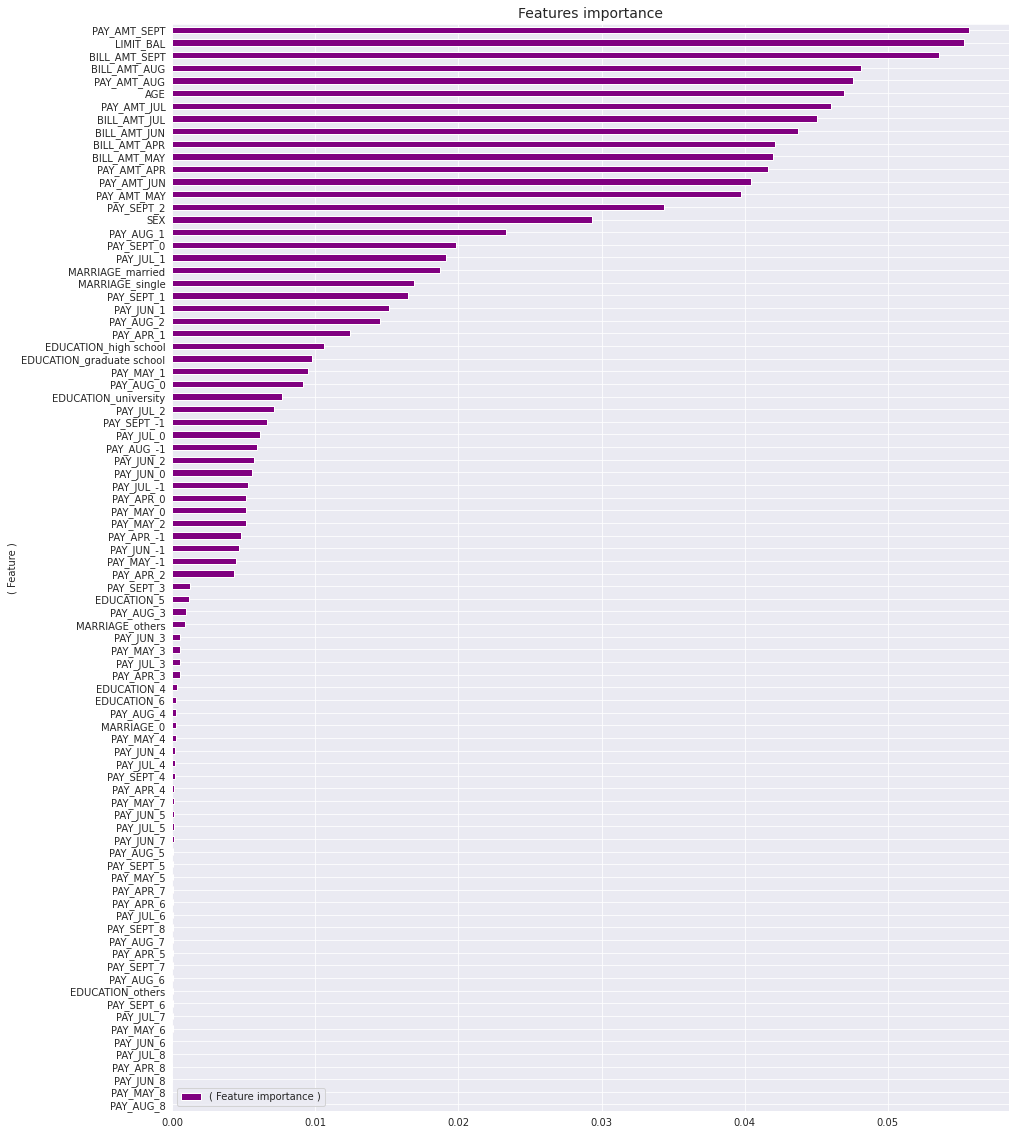

In [ ]:
fea_imp = pd.DataFrame({'( Feature )': columns, '( Feature importance )': optimal_rf_clf.feature_importances_})
fea_imp = fea_imp.sort_values(by='( Feature importance )')
figure, ax = plt.subplots(figsize = (15,20))
fea_imp.plot.barh(x='( Feature )',y='( Feature importance )', ax=ax, color='purple')
plt.title('Features importance',fontsize=14)

* From the Above Graph We observer LIMT_BAL, BILL_AMT_SEPT AND PAY_AMT_SEPT are the strongest predictors of future payment default risk.

### Conclusion

* XGBoost model has the highest recall, if the business cares recall the most, then this model is the best candidate. If the balance of recall and precision is the most important metric, then Random Forest is the ideal model. Since Random Forest has slightly lower recall but much higher precision than Logistic Regression, I would recommend Random Forest. 

* Data categorical variables had minority classes which were added to their closest majority class

* There were not huge gap but female clients tended to default the most.

* Labels of the data were imbalanced and had a significant difference.

* Gradient boost gave the highest accuracy of 82% on test dataset.

* Repayment in the month of september tended to be the most important feature for our machine learning model.

* The best accuracy is obtained for the Random forest and XGBoost classifier.
 
* In general, all models have comparable accuracy. Nevertheless, because the classes are imbalanced (the proportion of non-default credit cards is higher than default) this metric is misleading. 
 
* Furthermore, accuracy does not consider the rate of false positives (non-default credits cards that were predicted as default) and false negatives (default credit cards that were incorrectly predicted as non-default). 
 
* Both cases have negative impact on the bank, since false positives leads to unsatisfied customers and false negatives leads to financial loss.
 
* From above table we can see that XGBoost Classifier having Recall, F1-score, and ROC Score values equals 82%, 77%, and 86% and Random forest Classifier having Recall, F1-score and ROC Score values equals 81%, 75%, and 84%.
 
* XGBoost Classifier and Decision Tree Classifier are giving us the best Recall, F1-score, and ROC Score among other algorithms. We can conclude that these two algorithms are the best to predict whether the credit card is default or not default according to our analysis.

# <center> `Thank You` </center>